In [1]:
#read the date
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import ast
from pandas import DataFrame, Series
import json
plt.rcParams['font.sans-serif'] = ['SimHei']
movies = pd.read_csv('movies_metadata.csv',encoding='utf-8',low_memory=False)
credits = pd.read_csv('credits.csv',encoding='utf-8')

In [2]:
#data Processing
#movies.countries
for i in range(len(movies)):
  if str(movies.loc[i,'production_countries'])[0]!='[':
        movies.loc[i,'production_countries']='[]'
l=['genres','production_countries']
for i in l:
    movies[i]=movies[i].apply(ast.literal_eval).apply(json.dumps)
    movies[i]=movies[i].apply(json.loads)
#get director
credits['crew']=credits['crew'].apply(ast.literal_eval).apply(json.dumps)
credits['crew']=credits['crew'].apply(json.loads)

In [3]:
movies.info()
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45466 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [4]:
#get director
def director(x):
    for i in x:
        if i['job'] == 'Director': #director
            return i['name']
credits['crew'] = credits['crew'].apply(director) 
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...",John Lasseter,862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",Joe Johnston,8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...",Howard Deutch,15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...",Forest Whitaker,31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...",Charles Shyer,11862


In [5]:
credits.rename(columns={'crew':'director'},inplace = True)
del credits['cast']
credits.head()

,director,id
0,John Lasseter,862
1,Joe Johnston,8844
2,Howard Deutch,15602
3,Forest Whitaker,31357
4,Charles Shyer,11862


In [6]:
def get_name(x):
    return ','.join([i['name'] for i in x])
#used for movies
movies['genres']=movies['genres'].apply(get_name)
movies['production_countries']=movies['production_countries'].apply(get_name)

In [7]:
movies['id']=movies['id'].apply(pd.to_numeric,errors = 'coerce')
df = pd.merge(movies,credits,how='left',on='id')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45542 entries, 0 to 45541
Data columns (total 25 columns):
adult                    45542 non-null object
belongs_to_collection    4503 non-null object
budget                   45542 non-null object
genres                   45542 non-null object
homepage                 7795 non-null object
id                       45539 non-null float64
imdb_id                  45525 non-null object
original_language        45531 non-null object
original_title           45542 non-null object
overview                 44588 non-null object
popularity               45537 non-null object
poster_path              45156 non-null object
production_companies     45539 non-null object
production_countries     45542 non-null object
release_date             45455 non-null object
revenue                  45536 non-null float64
runtime                  45279 non-null float64
spoken_languages         45536 non-null object
status                   45455 non-null obje

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"Animation,Comedy,Family",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,John Lasseter
1,False,NaN,65000000,"Adventure,Fantasy,Family",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Joe Johnston
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"Romance,Comedy",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Howard Deutch
3,False,NaN,16000000,"Comedy,Drama,Romance",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,Forest Whitaker
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Charles Shyer


In [8]:
df.drop(['homepage','original_title','adult','belongs_to_collection','imdb_id','poster_path','production_companies','tagline','spoken_languages','overview'],axis=1,inplace=True)

In [9]:
df.drop(['status','video'],axis=1,inplace=True)
df2=df
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45542 entries, 0 to 45541
Data columns (total 13 columns):
budget                  45542 non-null object
genres                  45542 non-null object
id                      45539 non-null float64
original_language       45531 non-null object
popularity              45537 non-null object
production_countries    45542 non-null object
release_date            45455 non-null object
revenue                 45536 non-null float64
runtime                 45279 non-null float64
title                   45536 non-null object
vote_average            45536 non-null float64
vote_count              45536 non-null float64
director                44651 non-null object
dtypes: float64(5), object(8)
memory usage: 4.9+ MB


In [10]:
df['budget'] = df['budget'].apply(pd.to_numeric,errors = 'coerce')
df['popularity'] = df['popularity'].apply(pd.to_numeric,errors = 'coerce')
df.loc[:,'runtime']=df['runtime'].fillna(df.runtime.mean())
df.info()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45542 entries, 0 to 45541
Data columns (total 13 columns):
budget                  45539 non-null float64
genres                  45542 non-null object
id                      45539 non-null float64
original_language       45531 non-null object
popularity              45536 non-null float64
production_countries    45542 non-null object
release_date            45455 non-null object
revenue                 45536 non-null float64
runtime                 45542 non-null float64
title                   45536 non-null object
vote_average            45536 non-null float64
vote_count              45536 non-null float64
director                44651 non-null object
dtypes: float64(7), object(6)
memory usage: 4.9+ MB


director                891
release_date             87
original_language        11
vote_count                6
vote_average              6
title                     6
revenue                   6
popularity                6
id                        3
budget                    3
runtime                   0
production_countries      0
genres                    0
dtype: int64

In [11]:
df=df.dropna(axis=0,how='any',subset=['director','release_date','original_language'])

In [12]:
df.isnull().sum().sort_values(ascending=False)    

director                0
vote_count              0
vote_average            0
title                   0
runtime                 0
revenue                 0
release_date            0
production_countries    0
popularity              0
original_language       0
id                      0
genres                  0
budget                  0
dtype: int64

In [13]:
#get genre
genre = set()
for i in df['genres'].str.split(','):
    genre = set().union(i,genre)
genre=list(genre)
genre.remove('')
genre

['TV Movie',
 'Romance',
 'Adventure',
 'Crime',
 'Drama',
 'Action',
 'Western',
 'Documentary',
 'Mystery',
 'War',
 'Music',
 'Horror',
 'Family',
 'Animation',
 'Fantasy',
 'Comedy',
 'Science Fiction',
 'Foreign',
 'Thriller',
 'History']

In [15]:
df.loc[:,'release_year']=pd.to_datetime(df.release_date,format='%Y-%m-%d').dt.year
df.loc[:,'release_month']=pd.to_datetime(df.release_date,format='%Y-%m-%d').dt.month
df.head()

,budget,genres,id,original_language,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,director,release_year,release_month
0,30000000.0,"Animation,Comedy,Family",862.0,en,21.946943,United States of America,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,John Lasseter,1995,10
1,65000000.0,"Adventure,Fantasy,Family",8844.0,en,17.015539,United States of America,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,Joe Johnston,1995,12
2,0.0,"Romance,Comedy",15602.0,en,11.712900,United States of America,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,Howard Deutch,1995,12
3,16000000.0,"Comedy,Drama,Romance",31357.0,en,3.859495,United States of America,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,Forest Whitaker,1995,12
4,0.0,Comedy,11862.0,en,8.387519,United States of America,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,Charles Shyer,1995,2


In [16]:
#relationship between number of movies and genre
for gen in genre:
    df.loc[:,gen] = df['genres'].str.contains(gen).apply(lambda x:1 if x else 0)
df.head()

,budget,genres,id,original_language,popularity,production_countries,release_date,revenue,runtime,title,...,Music,Horror,Family,Animation,Fantasy,Comedy,Science Fiction,Foreign,Thriller,History
0,30000000.0,"Animation,Comedy,Family",862.0,en,21.946943,United States of America,1995-10-30,373554033.0,81.0,Toy Story,...,0,0,1,1,0,1,0,0,0,0
1,65000000.0,"Adventure,Fantasy,Family",8844.0,en,17.015539,United States of America,1995-12-15,262797249.0,104.0,Jumanji,...,0,0,1,0,1,0,0,0,0,0
2,0.0,"Romance,Comedy",15602.0,en,11.712900,United States of America,1995-12-22,0.0,101.0,Grumpier Old Men,...,0,0,0,0,0,1,0,0,0,0
3,16000000.0,"Comedy,Drama,Romance",31357.0,en,3.859495,United States of America,1995-12-22,81452156.0,127.0,Waiting to Exhale,...,0,0,0,0,0,1,0,0,0,0
4,0.0,Comedy,11862.0,en,8.387519,United States of America,1995-02-10,76578911.0,106.0,Father of the Bride Part II,...,0,0,0,0,0,1,0,0,0,0


In [17]:
df_gy = df.loc[:,genre]
df_gy.index = df['release_year']
df_gy.head()

,TV Movie,Romance,Adventure,Crime,Drama,Action,Western,Documentary,Mystery,War,Music,Horror,Family,Animation,Fantasy,Comedy,Science Fiction,Foreign,Thriller,History
release_year,,,,,,,,,,,,,,,,,,,,
1995,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
1995,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1995,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [18]:
print(df_gy.index.max())
print(df_gy.index.min())

2020
1874


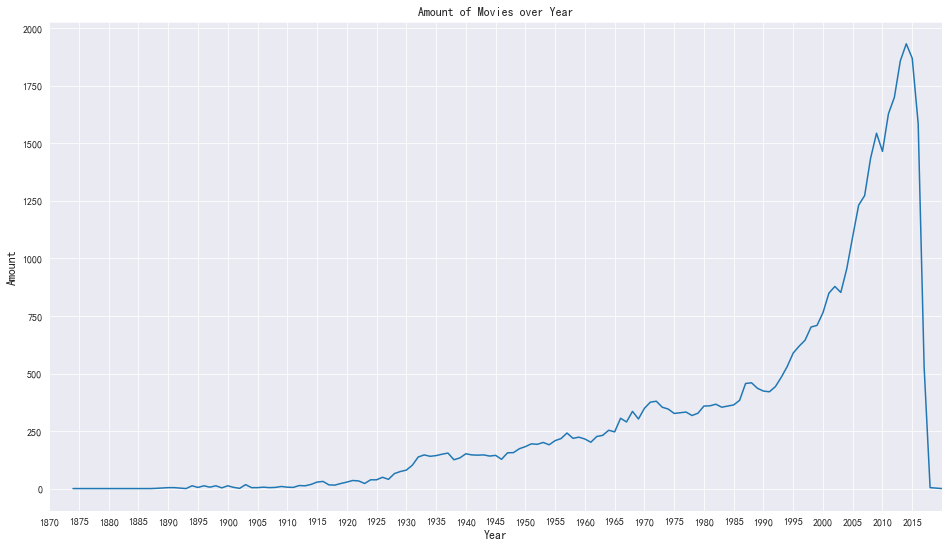

In [19]:
df_gy.groupby('release_year').count().Adventure.plot(figsize=(16, 9))
plt.xticks(range(1870,2020,5))
plt.title('Amount of Movies over Year',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Amount',fontsize=12)
plt.show()

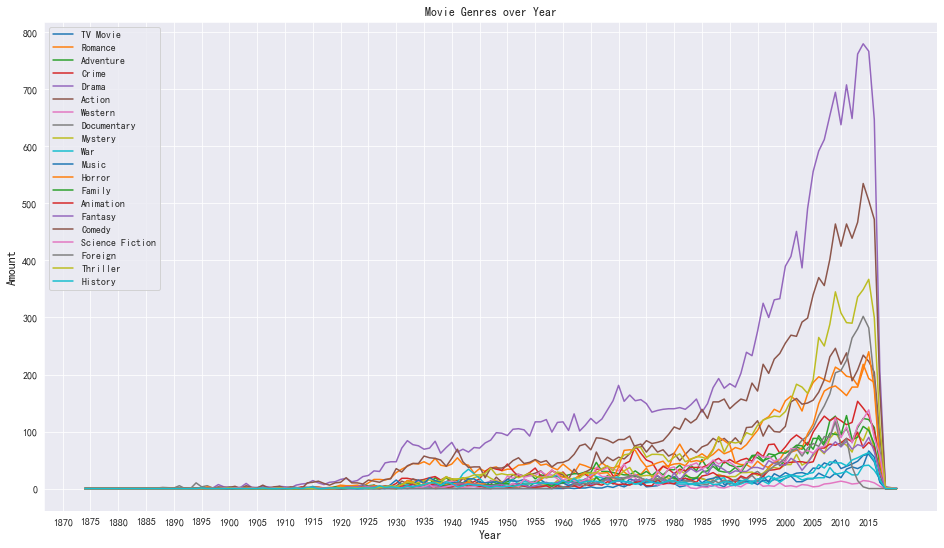

In [20]:
#relationship between year and number of movie
df_gy1=df_gy.sort_index(ascending=False)#根据索引年份排序
df_gys = df_gy1.groupby('release_year').sum()
plt.figure(figsize=(16, 9))#size
plt.plot(df_gys,label=df_gys.columns)
plt.legend(df_gys)
plt.xticks(range(1870,2020,5))
plt.title('Movie Genres over Year',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Amount',fontsize=12)
plt.show()

In [21]:
print(df_gy1.groupby('release_year').sum().max())

TV Movie            66
Romance            218
Adventure          127
Crime              153
Drama              780
Action             246
Western             43
Documentary        302
Mystery            108
War                 41
Music               60
Horror             240
Family             128
Animation           99
Fantasy             90
Comedy             535
Science Fiction    138
Foreign            117
Thriller           367
History             63
dtype: int64


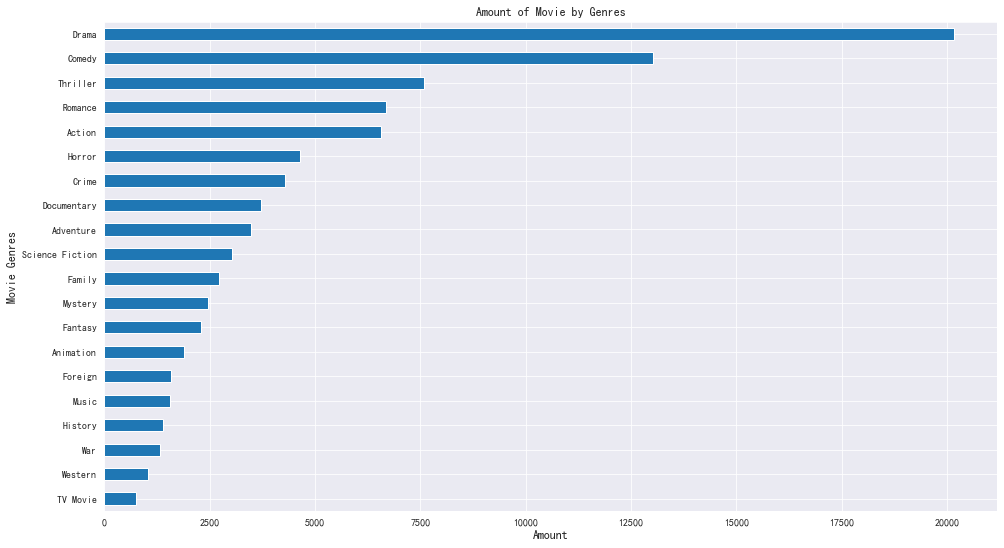

In [22]:
df_gysum = df_gys.sum().sort_values(ascending=True)
df_gysum
df_gysum.plot.barh(label='genre',figsize=(16,9))
plt.title('Amount of Movie by Genres',fontsize=12)
plt.xlabel('Amount',fontsize=12)
plt.ylabel('Movie Genres',fontsize=12)
plt.show()

In [23]:
countrys = set()
for i in df['production_countries'].str.split(','):
    countrys=set().union(i,countrys)
countrys.remove('')
for country in countrys:
    df.loc[:,country] = df['production_countries'].str.contains(country).apply(lambda x:1 if x else 0)
df_coun = df.loc[:,countrys]
df_coun.index = df['release_year']
df_counts=df_coun.sort_index(ascending=False).sum().sort_values(ascending=False)
df_countss=df_counts[df_counts>10]   



Text(0.5, 1.0, 'Distribution of Movie Origin')

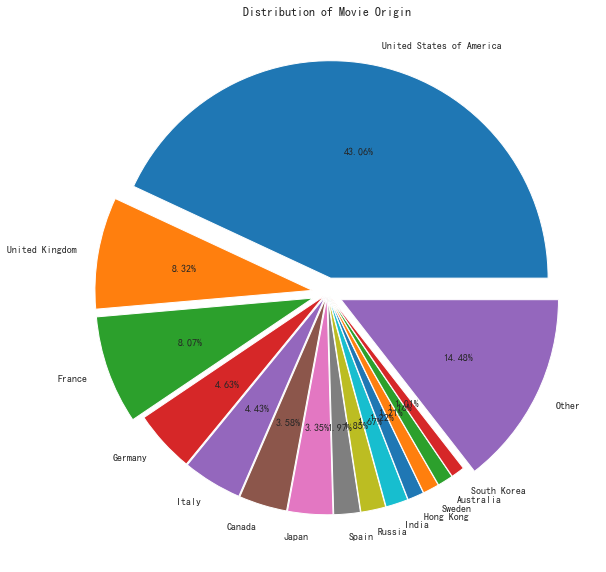

In [24]:
co=df_countss/df_countss.sum()
others=0.01
co1=co[co>=others]
co1['Other']=co[co<others].sum()
explode =(co1>=0.05)/20+0.02
co1.plot.pie(autopct='%1.2f%%',figsize=(10,10),explode=explode,label='')
plt.title('Distribution of Movie Origin',fontsize=12)

In [25]:
df.revenue.describe()

count    4.460500e+04
mean     1.143118e+07
std      6.492848e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [26]:
df.budget.describe()

count    4.460500e+04
mean     4.310301e+06
std      1.758398e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [27]:
df.loc[:,'profit']=df['revenue']-df['budget']
df_gen_pro=pd.DataFrame(index=genre)
list1=[]
for genr in genre:
    list1.append(df.groupby(genr)['profit'].mean())
list2=[]

#print(list2)
for i in range(len(genre)):
    list2.append(list1[i][1])
df_gen_pro['mean_profit']=list2

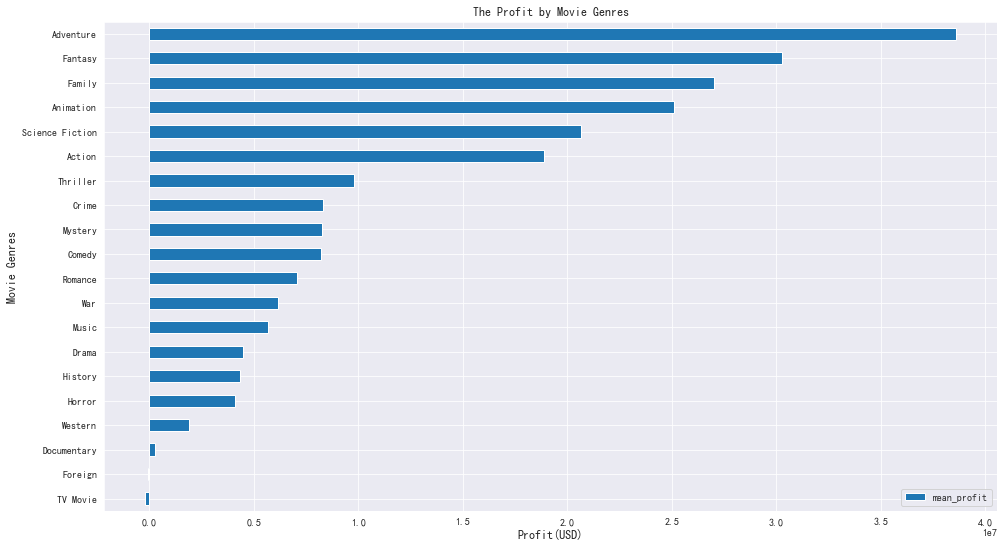

In [28]:
df_gen_pro.sort_values(by='mean_profit',ascending=True).plot.barh(label='genre',figsize=(16,9))
plt.title('The Profit by Movie Genres',fontsize=12)
plt.xlabel('Profit(USD)',fontsize=12)
plt.ylabel('Movie Genres',fontsize=12)
plt.grid(True)
plt.show()

In [29]:
df_gen_popu=pd.DataFrame(index=genre)
list1=[]
for genr in genre:
    list1.append(df.groupby(genr)['popularity'].mean())
list2=[]
for i in range(len(genre)):
    list2.append(list1[i][1])
df_gen_popu['mean_popularity']=list2
df_gen_popu.head()

,mean_popularity
TV Movie,2.056440
Romance,3.140122
Adventure,6.031258
Crime,4.160229
Drama,3.029824


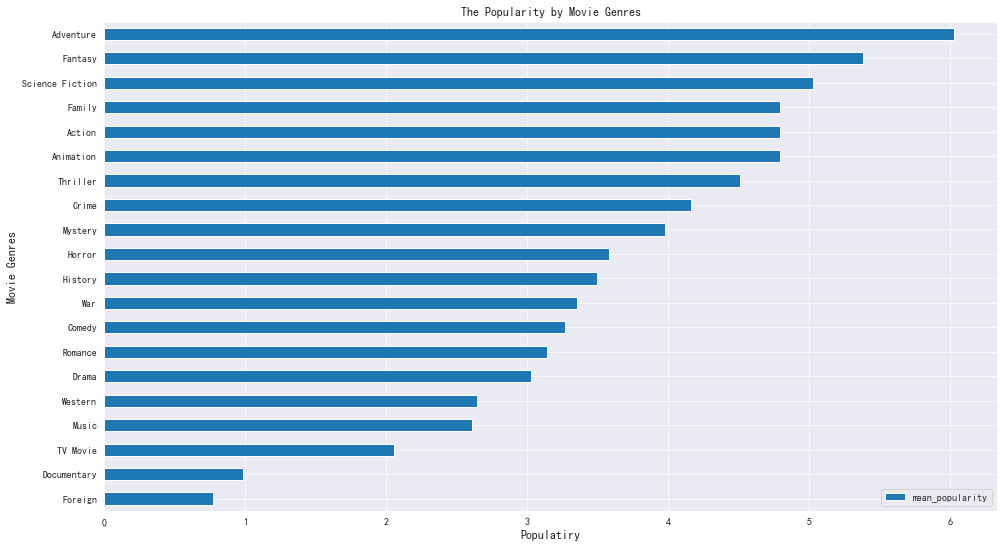

In [30]:
df_gen_popu.sort_values(by='mean_popularity',ascending=True).plot.barh(label='genre',figsize=(16,9))
plt.title('The Popularity by Movie Genres',fontsize=12)
plt.xlabel('Populatiry',fontsize=12)
plt.ylabel('Movie Genres',fontsize=12)
plt.grid(True)
plt.show()

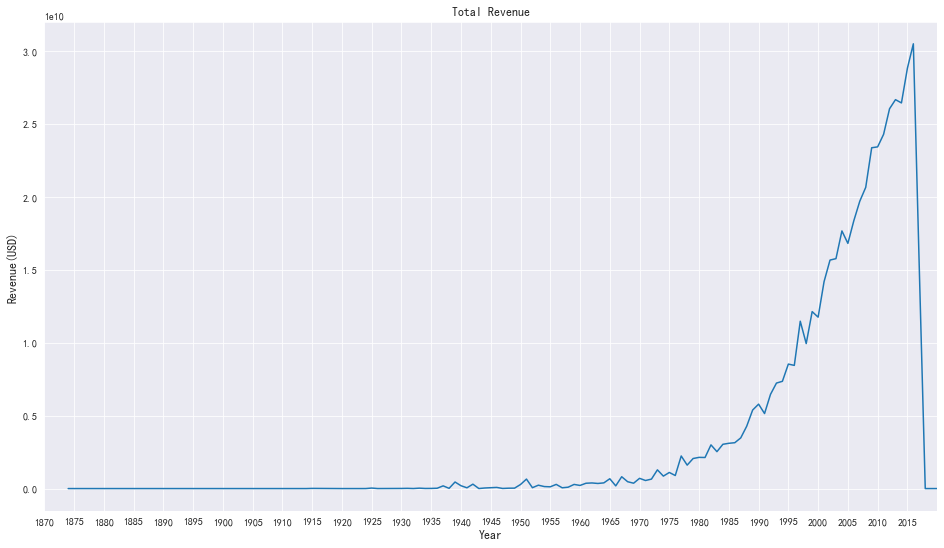

In [31]:
df_revenue=df.groupby('release_year')['revenue'].sum()
df_revenue.plot(figsize=(16, 9))
plt.xticks(range(1870,2018,5))
plt.title('Total Revenue',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Revenue(USD)',fontsize=12)
plt.show()

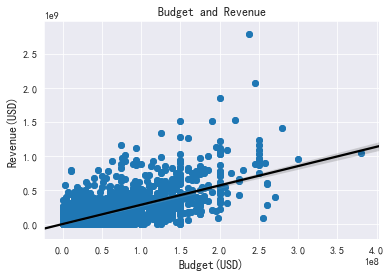

In [32]:
plt.scatter(x=df.budget,y=df.revenue)
sns.regplot(df['budget'], df['revenue'],line_kws={"color": "black"})
plt.xlabel('Budget(USD)',fontsize=12)
plt.ylabel('Revenue(USD)',fontsize=12)
plt.title('Budget and Revenue',fontsize=12)
plt.show()

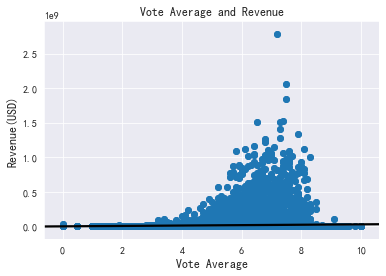

In [33]:
plt.scatter(x=df.vote_average,y=df.revenue)
sns.regplot(df['vote_average'], df['revenue'],line_kws={"color": "black"})
plt.xlabel('Vote Average',fontsize=12)
plt.ylabel('Revenue(USD)',fontsize=12)
plt.title('Vote Average and Revenue',fontsize=12)
plt.show()

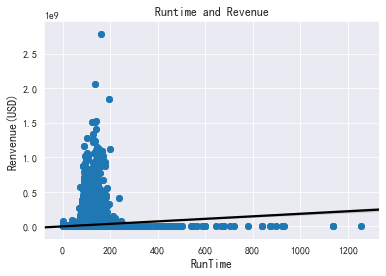

In [34]:
plt.scatter(x=df.runtime,y=df.revenue)
sns.regplot(df['runtime'], df['revenue'],line_kws={"color": "black"})
plt.xlabel('RunTime',fontsize=12)
plt.ylabel('Renvenue(USD)',fontsize=12)
plt.title('Runtime and Revenue',fontsize=12)
plt.show()

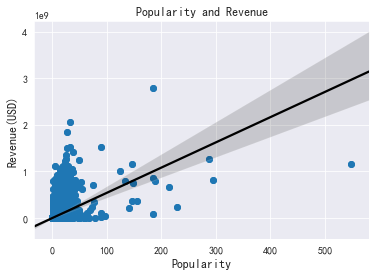

In [35]:
plt.scatter(x=df.popularity,y=df.revenue)
sns.regplot(df['popularity'], df['revenue'],line_kws={"color": "black"})
plt.xlabel('Popularity',fontsize=12)
plt.ylabel('Revenue(USD)',fontsize=12)
plt.title('Popularity and Revenue',fontsize=12)
plt.show()

In [36]:
direct=df['director'].value_counts()
direct.describe()

count    17543.000000
mean         2.542610
std          3.778075
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         66.000000
Name: director, dtype: float64

John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      50
Woody Allen         49
Jean-Luc Godard     47
Sidney Lumet        46
Charlie Chaplin     44
Raoul Walsh         43
Name: director, dtype: int64


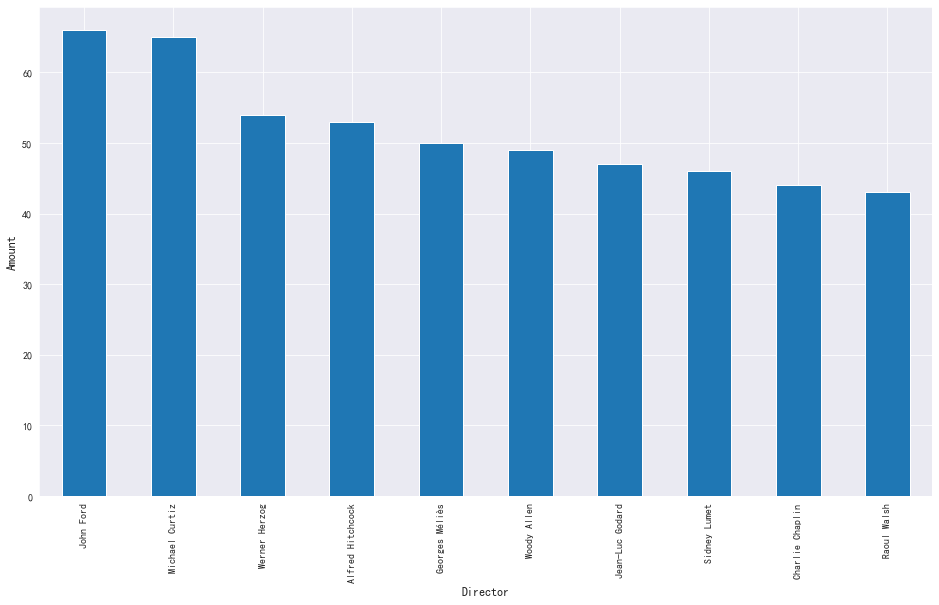

In [37]:
direct1=direct[:10]
direct1.plot.bar(figsize=(16,9))
plt.xlabel('Director',fontsize=12)
plt.ylabel('Amount',fontsize=12)
print(direct1)

director
Aditya Chopra         9.1
Makoto Shinkai        8.5
Roberto Benigni       8.3
Tom Hanks             8.2
Isao Takahata         8.2
Tony Kaye             8.2
Eric Toledano         8.2
Akira Kurosawa        8.2
Fernando Meirelles    8.2
Irvin Kershner        8.2
Name: vote_average, dtype: float64


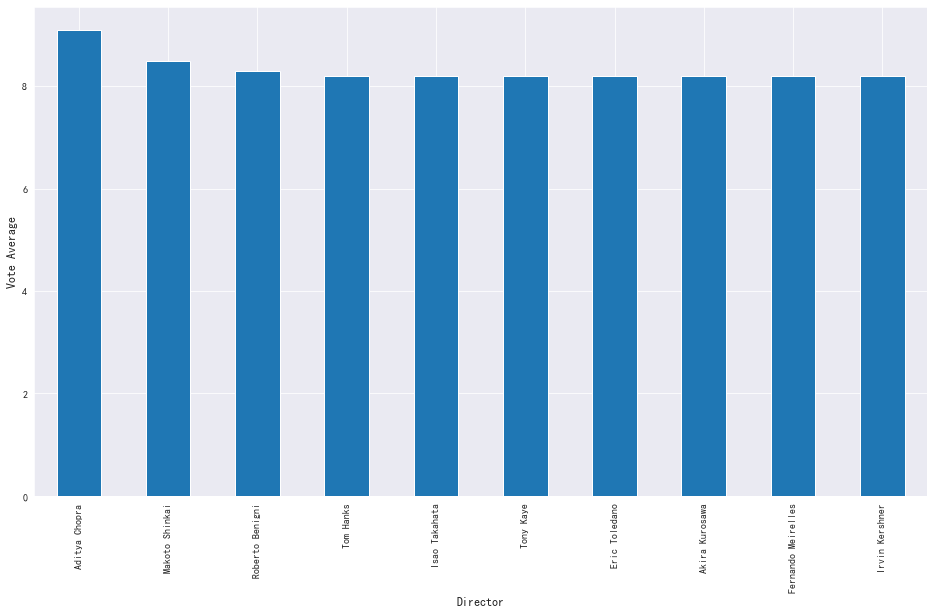

In [38]:
direct2=df[df.vote_count>500].groupby('director')['vote_average'].mean().sort_values(ascending=False)[:10]
direct2.plot.bar(figsize=(16,9))
plt.xlabel('Director',fontsize=12)
plt.ylabel('Vote Average',fontsize=12)
print(direct2)

director
Lee Unkrich            1.066970e+09
Chris Miller           7.989582e+08
Tim Miller             7.831130e+08
Robert Stromberg       7.585398e+08
Pierre Coffin          7.571379e+08
Dan Scanlon            7.435596e+08
J.J. Abrams            7.158431e+08
Andrew Stanton         6.935893e+08
Chris Buck             6.371095e+08
Jennifer Yuh Nelson    5.934316e+08
Name: revenue, dtype: float64


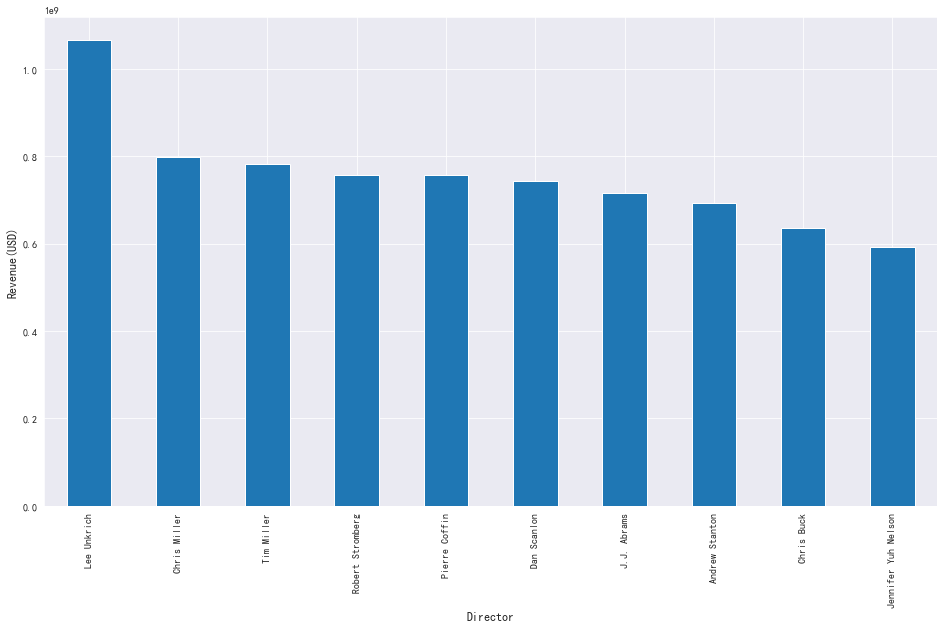

In [39]:
direct3=df.groupby('director')['revenue'].mean().sort_values(ascending=False)[:10]
direct3.plot.bar(figsize=(16,9))
plt.xlabel('Director',fontsize=12)
plt.ylabel('Revenue(USD)',fontsize=12)
print(direct3)